In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

In [2]:
# get 2026 election data
df = pd.read_csv('https://raw.githubusercontent.com/muhallilahnaf/election-2026-live/master/data/seat_votes_pa.csv')
df.head()

,seat_no,name,vote,party,alliance,seat,district,division,region,voters,male_voters,female_voters,thirdgender_voters,time,vote_pc
0,95,কপিল কৃষ্ণ মন্ডল,114323,BNP,BNP,Bagerhat-1,Bagerhat,Khulna,Rural,375560.0,190838.0,184720.0,2.0,2026-02-14 06:07:03.699877+00:00,30.44
1,95,মোঃ মশিউর রহমান খান,117527,Jamaat,Jamaat-NCP,Bagerhat-1,Bagerhat,Khulna,Rural,375560.0,190838.0,184720.0,2.0,2026-02-14 06:07:03.699877+00:00,31.29
2,96,শেখ মোহাম্মদ জাকির হোসেন,66409,BNP,BNP,Bagerhat-2,Bagerhat,Khulna,Urban,338009.0,167739.0,170265.0,5.0,2026-02-14 06:07:03.699877+00:00,19.65
3,96,শেখ মনজুরুল হক (রাহাদ),117709,Jamaat,Jamaat-NCP,Bagerhat-2,Bagerhat,Khulna,Urban,338009.0,167739.0,170265.0,5.0,2026-02-14 06:07:03.699877+00:00,34.82
4,97,শেখ ফরিদুল ইসলাম,103711,BNP,BNP,Bagerhat-3,Bagerhat,Khulna,Rural,266864.0,132350.0,134510.0,4.0,2026-02-14 06:07:03.699877+00:00,38.86


In [3]:
# find winning party in each seat
idx = df.groupby('seat')['vote'].idxmax()
dfw = df.loc[idx]
dfw.head()

,seat_no,name,vote,party,alliance,seat,district,division,region,voters,male_voters,female_voters,thirdgender_voters,time,vote_pc
1,95,মোঃ মশিউর রহমান খান,117527,Jamaat,Jamaat-NCP,Bagerhat-1,Bagerhat,Khulna,Rural,375560.0,190838.0,184720.0,2.0,2026-02-14 06:07:03.699877+00:00,31.29
3,96,শেখ মনজুরুল হক (রাহাদ),117709,Jamaat,Jamaat-NCP,Bagerhat-2,Bagerhat,Khulna,Urban,338009.0,167739.0,170265.0,5.0,2026-02-14 06:07:03.699877+00:00,34.82
4,97,শেখ ফরিদুল ইসলাম,103711,BNP,BNP,Bagerhat-3,Bagerhat,Khulna,Rural,266864.0,132350.0,134510.0,4.0,2026-02-14 06:07:03.699877+00:00,38.86
7,98,মোঃ আব্দুল আলীম,116067,Jamaat,Jamaat-NCP,Bagerhat-4,Bagerhat,Khulna,Rural,NaN,NaN,NaN,NaN,2026-02-14 06:07:03.699877+00:00,NaN
8,300,সাচিং প্রু,141455,BNP,BNP,Bandarban,Bandarban,Chittagong,Rural,NaN,NaN,NaN,NaN,2026-02-14 06:07:03.699877+00:00,NaN


In [4]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [5]:
# join data with map data
mapw = pd.merge(bdmap, dfw[['seat', 'party']], how='left', on='seat')

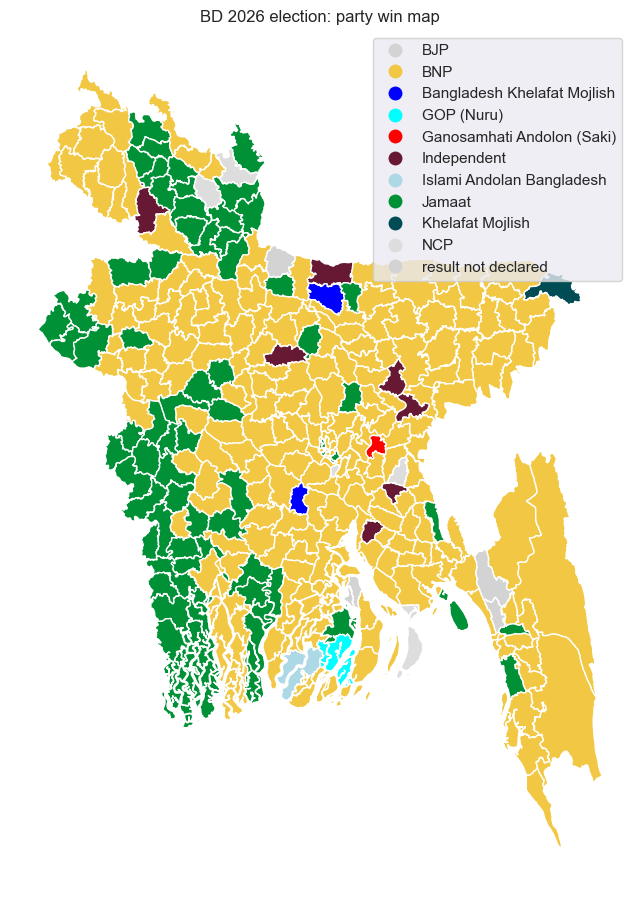

In [10]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))

cmap = ListedColormap(['#d3d3d3', '#F2C744', 'blue', 'cyan', 'red', '#671933', '#ADD8E6', '#009036', '#004c55', '#dddddd'])

mapw.plot(
    column='party', 
    categorical=True,
    cmap=cmap, 
    legend=True, 
    ax=ax, 
    missing_kwds={
        "color": "lightgrey",
        "label": "result not declared",
    }
)
ax.set_axis_off()
ax.title.set_text("BD 2026 election: party win map")
fig.savefig('fig/election_2026_party_win_map',bbox_inches='tight')

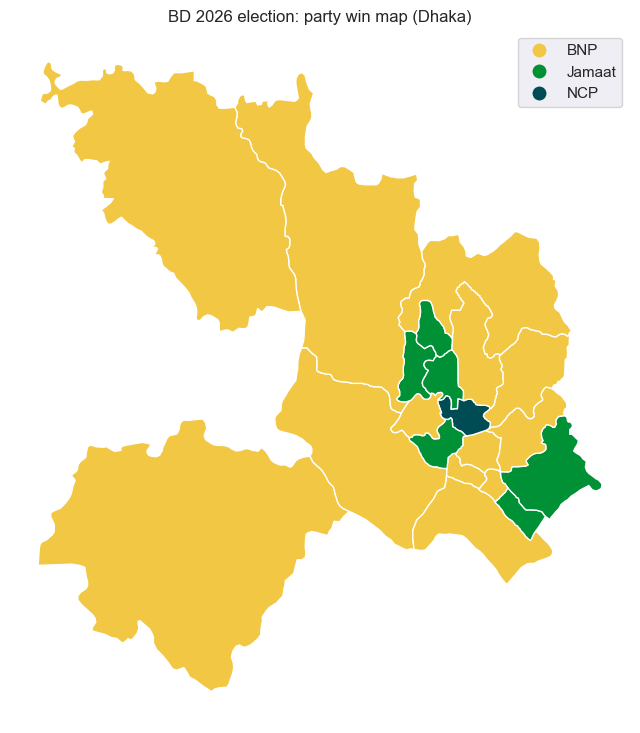

In [11]:
# plot map of Dhaka
mapw_dhaka = mapw[mapw.district=='Dhaka']

cmap = ListedColormap(['#F2C744', '#009036', '#004c55'])

fig, ax = plt.subplots(figsize=(8, 14))
mapw_dhaka.plot(
    column='party', 
    categorical=True,
    cmap=cmap, 
    legend=True, 
    ax=ax, 
    missing_kwds={
        "color": "lightgrey",
        "label": "result not declared",
    }
)
ax.set_axis_off()
ax.title.set_text("BD 2026 election: party win map (Dhaka)")

fig.savefig('fig/election_2026_party_win_map_dhaka',bbox_inches='tight')

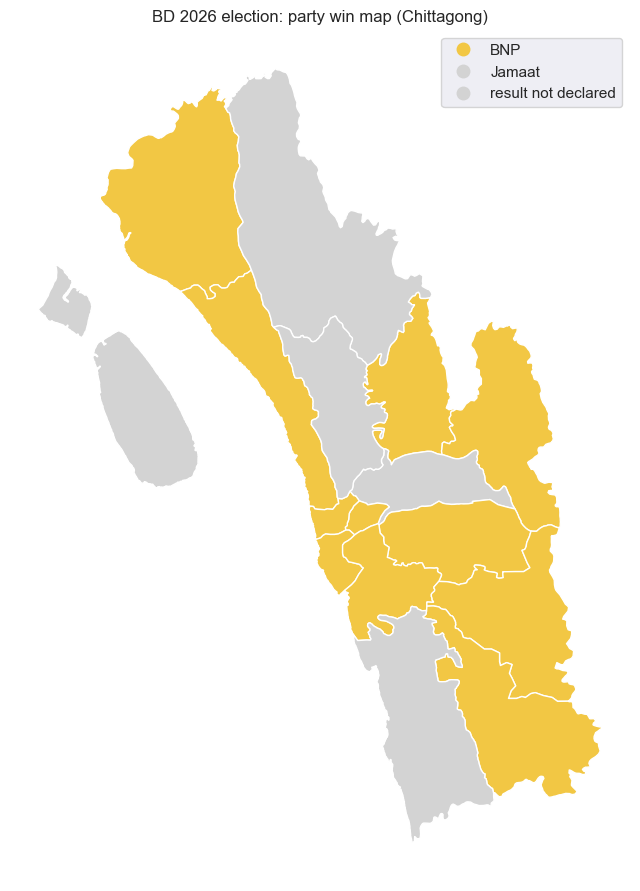

In [12]:
# plot map of Chittagong
mapw_ctg = mapw[mapw.district=='Chittagong']

cmap = ListedColormap(['#F2C744', '#009036', '#d3d3d3'])

fig, ax = plt.subplots(figsize=(8, 14))
mapw_ctg.plot(
    column='party', 
    categorical=True,
    cmap=cmap, 
    legend=True, 
    ax=ax, 
    missing_kwds={
        "color": "lightgrey",
        "label": "result not declared",
    }
)
ax.set_axis_off()
ax.title.set_text("BD 2026 election: party win map (Chittagong)")
fig.savefig('fig/election_2026_party_win_map_ctg',bbox_inches='tight')

In [13]:
# calculate turnout
dflt = df.groupby('seat').agg(turnout=('vote', 'sum'), voters=('voters', 'first')).reset_index()
dflt['tpc'] = (dflt['turnout'] / dflt['voters'] * 100).round(2)
dflt.head()

,seat,turnout,voters,tpc
0,Bagerhat-1,231850,375560.0,61.73
1,Bagerhat-2,184118,338009.0,54.47
2,Bagerhat-3,187416,266864.0,70.23
3,Bagerhat-4,214393,NaN,NaN
4,Bandarban,167617,NaN,NaN


In [14]:
# merge turnout and party win data
dftw = pd.merge(dfw[['seat', 'party']], dflt, how='outer', on='seat')
dftw.head()

,seat,party,turnout,voters,tpc
0,Bagerhat-1,Jamaat,231850,375560.0,61.73
1,Bagerhat-2,Jamaat,184118,338009.0,54.47
2,Bagerhat-3,BNP,187416,266864.0,70.23
3,Bagerhat-4,Jamaat,214393,NaN,NaN
4,Bandarban,BNP,167617,NaN,NaN


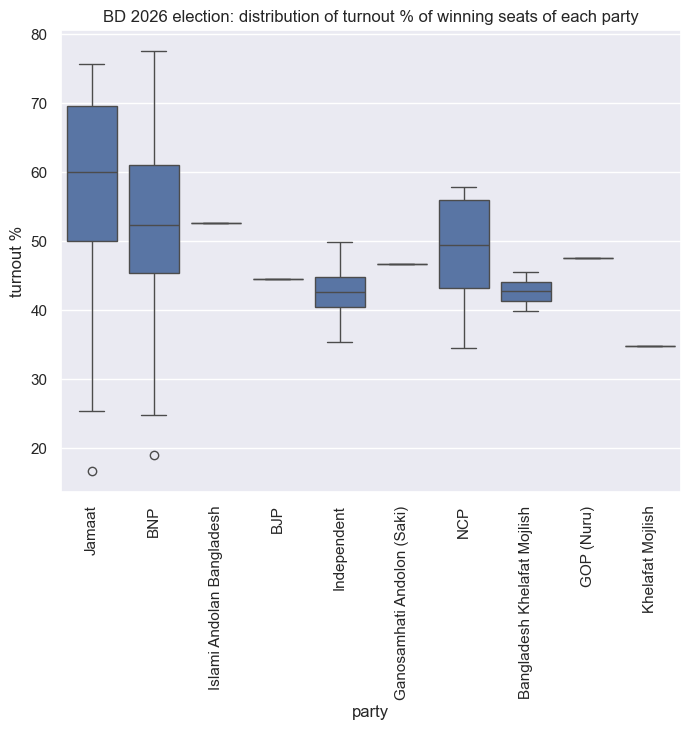

In [15]:
# plot distribution of turnout % of winning seats of each party
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dftw, x="party", y="tpc", ax=ax)
ax.set_title('BD 2026 election: distribution of turnout % of winning seats of each party')
ax.set_ylabel('turnout %')
ax.tick_params(axis='x', labelrotation=90)
fig.savefig('fig/election_2026_turnout_party_distn',bbox_inches='tight')